# Udacity Self-Driving Car Nanodegree
## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


In [1]:
import os
import cv2
import glob
import pickle
import numpy as np
import pylab as plt

%matplotlib inline
print("Processing is completed!")

Processing is completed!


There are no coners in image calibration4.jpg.
There are no coners in image calibration1.jpg.
There are no coners in image calibration5.jpg.
Processing is completed!


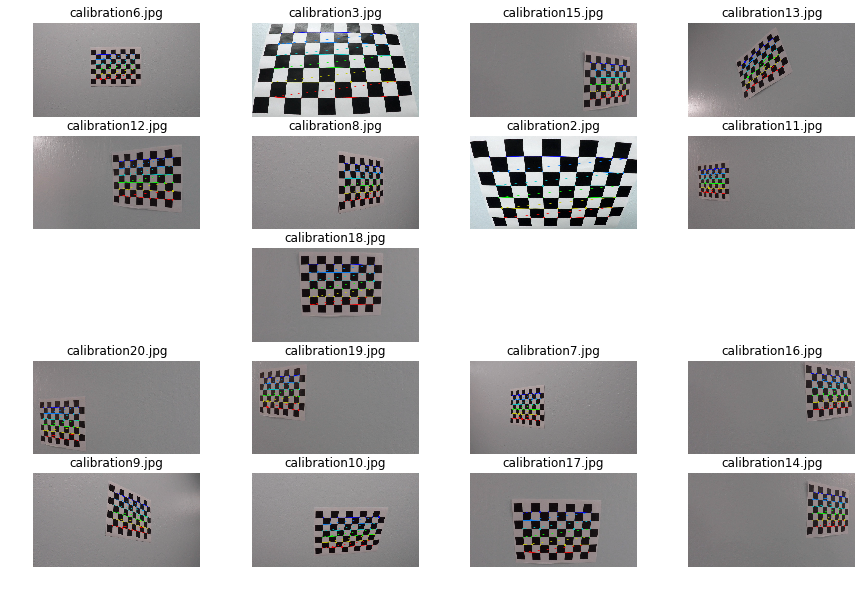

In [2]:
# prepare object points
nx = 9 #the number of inside corners in x
ny = 6 #the number of inside corners in y

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

plt.figure(figsize=(15, 10))

# Read images from image list and find the chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    # Converting an image, imported by cv2 or the glob API, to grayscale:
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
    
        # Drawing detected corners on an image:
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.subplot(5, 4, i+1)
        plt.title(os.path.basename(fname))
        plt.imshow(img)
        plt.axis('off')
       
    else:
        print("There are no coners in image %s." % os.path.basename(fname))
    
print("Processing is completed!")

#### Apply camera calibration process to Chessboard image

Processing is completed!


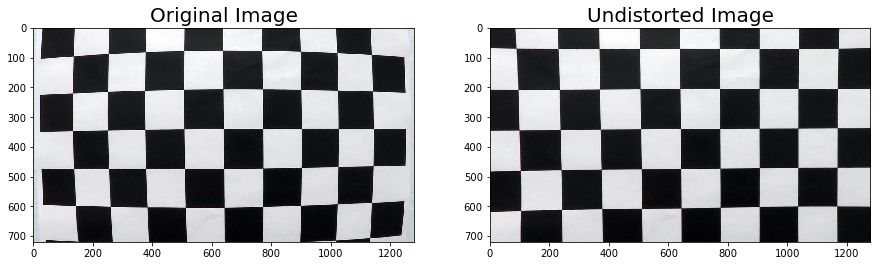

In [3]:
# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration.p", "wb" ) )

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)

print("Processing is completed!")

#### Apply camera calibration process to test image

In [4]:
# Choose an image from which to build and demonstrate each step of the pipeline
exampleImg = cv2.imread('./test_images/straight_lines1.jpg')
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
#plt.imshow(exampleImg)

print("Processing is completed!")

Processing is completed!


In [5]:
# undistort image using camera calibration matrix from above
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

print("Processing is completed!")

Processing is completed!


Processing is completed!


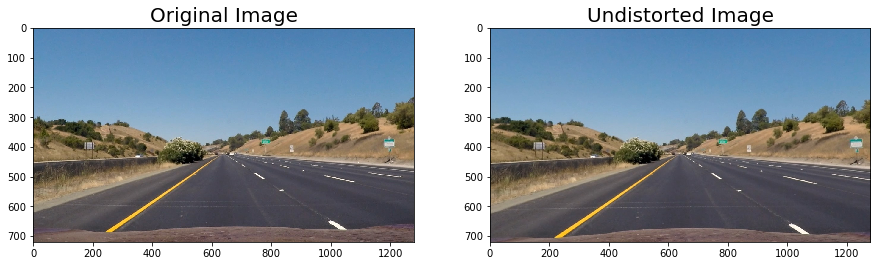

In [6]:
exampleImg_undistort = undistort(exampleImg)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.imshow(exampleImg)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(exampleImg_undistort)
ax2.set_title('Undistorted Image', fontsize=20)

print("Processing is completed!")

###### End of File